# Introduction to Pandas

*Pandas* is a high-performance Python library that allows us to easily use and manipulate data structures such as tables and series.

https://pandas.pydata.org/pandas-docs/stable/index.html

It connects directly to *NumPy* and *MatPlotLib* to manage numerical operations and plotting. This notebook is a quick introduction to the module. You are encouraged to explore more, for example starting here:

https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

## Defining data frames (tables) and series in pandas

In [59]:
import pandas as pd

We will define a table of information about the students of our class. We will try to reproduce the following tabular structure in *pandas*

| NIU     | Name              | Exam | Practicals |
|:-------:|:-----------------:|:----:|:----------:|  
| 111222  | Ned Stark         | 6.0  |    5.4     |   
| 123123  | Robert Baratheon  | 8.5  |    7.5     |   
| 234234  | Jaime Lannister   | 3.7  |    6.4     |   
| 345345  | Catelyn Stark     | 9.0  |    8.6     |   
| 456456  | Viserys Targaryen | 4.0  |    4.6     |   
| 567567  | Jon Snow          | 6.8  |    4.3     |   
| 678678  | Talisa Maegyr     | 7.6  |    0.0     |   

This table in pandas will be represented by a **data frame** which is implemented by the class `pandas.DataFrame`. Each column in a data frame is a **series** which is implemented by the `pandas.Series` object.

We will start with the first column, the NIU:

In [60]:
seriesNIU = pd.Series( [111222, 123123, 234234, 345345, 456456, 567567, 678678] )
print (seriesNIU)

0    111222
1    123123
2    234234
3    345345
4    456456
5    567567
6    678678
dtype: int64


See how pandas added an extra column with indices. The structure of a series is like a dictionary, where each value has an index and can be retrieved by using its index. For example:

In [61]:
seriesNIU[3]

345345

Let's define the rest of the columns of our table in the same way

In [62]:
seriesName = pd.Series( ["Ned Stark", "Robert Baratheon", "Jaime Lannister", "Catelyn Stark", "Viserys Targaryen", "Jon Snow", "Talisa Maegyr"] )
seriesExam = pd.Series( [6.0, 8.5, 3.7, 9.0, 4.0, 6.8, 7.6])
seriesPracticals = pd.Series( [5.4, 7.5, 6.4, 8.6, 4.6, 4.3, 0.0])

Now we can combine the series (the columns) together into a data frame (a table). The idea is the same, a dataframe can be thought of as a dictionary of columns, where each column has its title and its data.

In [63]:
d = {"NIU": seriesNIU,
     "Name": seriesName,
     "Exam": seriesExam,
     "Practicals": seriesPracticals}

dfStudents = pd.DataFrame(d)
dfStudents

,NIU,Name,Exam,Practicals
0,111222,Ned Stark,6.0,5.4
1,123123,Robert Baratheon,8.5,7.5
2,234234,Jaime Lannister,3.7,6.4
3,345345,Catelyn Stark,9.0,8.6
4,456456,Viserys Targaryen,4.0,4.6
5,567567,Jon Snow,6.8,4.3
6,678678,Talisa Maegyr,7.6,0.0


We can actually ask pandas to use our own custom indices. For example in this case, we could decide to use the NIUs as the indices. Let's tell pandas to use this column.

In [64]:
dfStudents = dfStudents.set_index('NIU')
dfStudents

# An alternative way would be to make the change in place by calling:
# dfStudents.set_index('NIU', inplace = True)

,Name,Exam,Practicals
NIU,,,
111222,Ned Stark,6.0,5.4
123123,Robert Baratheon,8.5,7.5
234234,Jaime Lannister,3.7,6.4
345345,Catelyn Stark,9.0,8.6
456456,Viserys Targaryen,4.0,4.6
567567,Jon Snow,6.8,4.3
678678,Talisa Maegyr,7.6,0.0


We can ask for some quick information about a data frame by using `DataFrame.info()`. This tells us what columns we have, how many values there are in each column, their types, etc.

In [65]:
dfStudents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 111222 to 678678
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        7 non-null      object 
 1   Exam        7 non-null      float64
 2   Practicals  7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 224.0+ bytes


Since a data frame is like a dictionary of columns, we can refer to each column by its name. For example, the following will return the columns of exam scores as a series:

In [66]:
scores = dfStudents["Exam"]
scores

NIU
111222    6.0
123123    8.5
234234    3.7
345345    9.0
456456    4.0
567567    6.8
678678    7.6
Name: Exam, dtype: float64

See how our exam scores are now indexed using the NIU, as they should.

We can also filter specific rows of our table by using a mask. By mask I mean a list (or series) of `True` and `False` values. An easy way to create a mask is by using bollean operations, for example

In [67]:
passScoresMask = scores > 5.0
passScoresMask

NIU
111222     True
123123     True
234234    False
345345     True
456456    False
567567     True
678678     True
Name: Exam, dtype: bool

we can then use this mask to retrieve specific rows (the `True` ones):

In [68]:
dfStudents[passScoresMask]

,Name,Exam,Practicals
NIU,,,
111222,Ned Stark,6.0,5.4
123123,Robert Baratheon,8.5,7.5
345345,Catelyn Stark,9.0,8.6
567567,Jon Snow,6.8,4.3
678678,Talisa Maegyr,7.6,0.0


or directly:

In [69]:
dfStudents[ dfStudents["Exam"] > 5.0 ]

,Name,Exam,Practicals
NIU,,,
111222,Ned Stark,6.0,5.4
123123,Robert Baratheon,8.5,7.5
345345,Catelyn Stark,9.0,8.6
567567,Jon Snow,6.8,4.3
678678,Talisa Maegyr,7.6,0.0


Any boolean expression would do, for example get the members of the Stark family:

In [70]:
dfStudents[ dfStudents["Name"].str.contains("Stark")]

,Name,Exam,Practicals
NIU,,,
111222,Ned Stark,6.0,5.4
345345,Catelyn Stark,9.0,8.6


Or a list of students with specific exam scores:

In [71]:
dfStudents[ dfStudents["Exam"].isin([6.8, 8.5]) ]

,Name,Exam,Practicals
NIU,,,
123123,Robert Baratheon,8.5,7.5
567567,Jon Snow,6.8,4.3


Or the list of students that have passed both the exam and the practicals:

In [72]:
dfStudents[ (dfStudents["Exam"]>5) & (dfStudents["Practicals"]>5) ]

,Name,Exam,Practicals
NIU,,,
111222,Ned Stark,6.0,5.4
123123,Robert Baratheon,8.5,7.5
345345,Catelyn Stark,9.0,8.6


Read the documentation for the functions we used above, here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

To get a specific value in the table, you can first get the column and then the row in the column. To do that you should use the corresponding indices - the name of the column and the index for the row:

In [73]:
dfStudents["Exam"][111222]

6.0

Alternatively, you can use `DataFrame.loc` to access a cell. Careful! Now the row is the first index and the column is the second one.

In [74]:
dfStudents.loc[111222, "Exam"]

6.0

You can also use integer indices to access a specific location using the `DataFrame.iloc`. Same as before, the row is the first index and the column is the second one.

In [75]:
dfStudents.iloc[0, 0]

'Ned Stark'

In [76]:
dfStudents.iloc[1, 0]

'Robert Baratheon'

Adding a column is easy, you just have to tell pandas what you need in it (in the same way as you would add a new entry in a Python dictionary). Let's create a new column called "Total Mark" that is the average of the exam and the practicals grades:

In [77]:
dfStudents["Total Mark"] = (dfStudents["Exam"] + dfStudents["Practicals"]) / 2
dfStudents

,Name,Exam,Practicals,Total Mark
NIU,,,,
111222,Ned Stark,6.0,5.4,5.70
123123,Robert Baratheon,8.5,7.5,8.00
234234,Jaime Lannister,3.7,6.4,5.05
345345,Catelyn Stark,9.0,8.6,8.80
456456,Viserys Targaryen,4.0,4.6,4.30
567567,Jon Snow,6.8,4.3,5.55
678678,Talisa Maegyr,7.6,0.0,3.80


To change a value, you can also use `DataFrame.loc[]` or `DataFrame.iloc[]` passing the row and then the column of the item you want to set:

In [78]:
dfStudents.loc[111222, "Name"] = "Davos Seaworth" # The indices here are the row and column keys

dfStudents.iloc[1, 0] = "Brienne of Tarth" # the indices here are the row and column numbers

dfStudents

,Name,Exam,Practicals,Total Mark
NIU,,,,
111222,Davos Seaworth,6.0,5.4,5.70
123123,Brienne of Tarth,8.5,7.5,8.00
234234,Jaime Lannister,3.7,6.4,5.05
345345,Catelyn Stark,9.0,8.6,8.80
456456,Viserys Targaryen,4.0,4.6,4.30
567567,Jon Snow,6.8,4.3,5.55
678678,Talisa Maegyr,7.6,0.0,3.80


You can use the same way to add an new element, if you reference an element that does not exist it will be added in the list

In [79]:
dfStudents.loc["Starfleet_1234", "Name"] = "Jean Luc Piccard"
dfStudents

,Name,Exam,Practicals,Total Mark
NIU,,,,
111222,Davos Seaworth,6.0,5.4,5.70
123123,Brienne of Tarth,8.5,7.5,8.00
234234,Jaime Lannister,3.7,6.4,5.05
345345,Catelyn Stark,9.0,8.6,8.80
456456,Viserys Targaryen,4.0,4.6,4.30
567567,Jon Snow,6.8,4.3,5.55
678678,Talisa Maegyr,7.6,0.0,3.80
Starfleet_1234,Jean Luc Piccard,NaN,NaN,NaN


See that since we used a row index that does not exist, it was created for us. And since we only provided a value for the name, the rest are marked as "Not A Number" `NaN`. We can select all the rows that are NOT *NaN* using the function `notna()`.
> *To select all the values that ARE NaN you can use the function `isna()` or `isnull()`.*

In [80]:
viewWithoutNaNs = dfStudents[dfStudents["Exam"].notna()] # This is just a different view of the same data - the data itself has not been changed
viewWithoutNaNs

,Name,Exam,Practicals,Total Mark
NIU,,,,
111222,Davos Seaworth,6.0,5.4,5.70
123123,Brienne of Tarth,8.5,7.5,8.00
234234,Jaime Lannister,3.7,6.4,5.05
345345,Catelyn Stark,9.0,8.6,8.80
456456,Viserys Targaryen,4.0,4.6,4.30
567567,Jon Snow,6.8,4.3,5.55
678678,Talisa Maegyr,7.6,0.0,3.80


Let's fix that new row by providing values for all the columns:

In [81]:
dfStudents.loc["Starfleet_1234", :] = ["Jean Luc Picard", 10.0, 10.0, 10.0]

# Or equivalently
#dfStudents.loc["Starfleet_1234"] = ["Jean Luc Picard", 10.0, 10.0, 10.0]

dfStudents

,Name,Exam,Practicals,Total Mark
NIU,,,,
111222,Davos Seaworth,6.0,5.4,5.70
123123,Brienne of Tarth,8.5,7.5,8.00
234234,Jaime Lannister,3.7,6.4,5.05
345345,Catelyn Stark,9.0,8.6,8.80
456456,Viserys Targaryen,4.0,4.6,4.30
567567,Jon Snow,6.8,4.3,5.55
678678,Talisa Maegyr,7.6,0.0,3.80
Starfleet_1234,Jean Luc Picard,10.0,10.0,10.00


Another way to add rows is to use `DataFrame.append()`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html

In [82]:
dfStudents.append(pd.Series(["Seven of Nine", 10.0, 10.0, 10.0], index = ["Name", "Exam", "Practicals", "Total Mark"], name = "Starfleet_5678"))

,Name,Exam,Practicals,Total Mark
NIU,,,,
111222,Davos Seaworth,6.0,5.4,5.70
123123,Brienne of Tarth,8.5,7.5,8.00
234234,Jaime Lannister,3.7,6.4,5.05
345345,Catelyn Stark,9.0,8.6,8.80
456456,Viserys Targaryen,4.0,4.6,4.30
567567,Jon Snow,6.8,4.3,5.55
678678,Talisa Maegyr,7.6,0.0,3.80
Starfleet_1234,Jean Luc Picard,10.0,10.0,10.00
Starfleet_5678,Seven of Nine,10.0,10.0,10.00


Check though that `append()` returns a new object, it does not change the original. Check it out:

In [83]:
dfStudents

,Name,Exam,Practicals,Total Mark
NIU,,,,
111222,Davos Seaworth,6.0,5.4,5.70
123123,Brienne of Tarth,8.5,7.5,8.00
234234,Jaime Lannister,3.7,6.4,5.05
345345,Catelyn Stark,9.0,8.6,8.80
456456,Viserys Targaryen,4.0,4.6,4.30
567567,Jon Snow,6.8,4.3,5.55
678678,Talisa Maegyr,7.6,0.0,3.80
Starfleet_1234,Jean Luc Picard,10.0,10.0,10.00


If we wanted to save this change, we should do this:

In [84]:
dfStudents = dfStudents.append(pd.Series(["Seven of Nine", 10.0, 10.0, 10.0], index = ["Name", "Exam", "Practicals", "Total Mark"], name = "Starfleet_5678"))
dfStudents

,Name,Exam,Practicals,Total Mark
NIU,,,,
111222,Davos Seaworth,6.0,5.4,5.70
123123,Brienne of Tarth,8.5,7.5,8.00
234234,Jaime Lannister,3.7,6.4,5.05
345345,Catelyn Stark,9.0,8.6,8.80
456456,Viserys Targaryen,4.0,4.6,4.30
567567,Jon Snow,6.8,4.3,5.55
678678,Talisa Maegyr,7.6,0.0,3.80
Starfleet_1234,Jean Luc Picard,10.0,10.0,10.00
Starfleet_5678,Seven of Nine,10.0,10.0,10.00


Ok, Jean Luc and Seven of Nine are a bit out of place here, let's drop these two rows, literally:

In [85]:
dfStudents.drop("Starfleet_1234", inplace = True) # If we do not use inplace = True, then the function will return a view of the data
dfStudents.drop("Starfleet_5678", inplace = True)
dfStudents

,Name,Exam,Practicals,Total Mark
NIU,,,,
111222,Davos Seaworth,6.0,5.4,5.70
123123,Brienne of Tarth,8.5,7.5,8.00
234234,Jaime Lannister,3.7,6.4,5.05
345345,Catelyn Stark,9.0,8.6,8.80
456456,Viserys Targaryen,4.0,4.6,4.30
567567,Jon Snow,6.8,4.3,5.55
678678,Talisa Maegyr,7.6,0.0,3.80


We can now ask pandas for some quick statistics for the columns that contain numbers, by calling the function `DataFrame.describe()`

In [86]:
dfStudents.describe()

,Exam,Practicals,Total Mark
count,7.000000,7.000000,7.000000
mean,6.514286,5.257143,5.885714
std,2.077200,2.784395,1.856231
min,3.700000,0.000000,3.800000
25%,5.000000,4.450000,4.675000
50%,6.800000,5.400000,5.550000
75%,8.050000,6.950000,6.850000
max,9.000000,8.600000,8.800000


Or for a specific series

In [87]:
dfStudents["Total Mark"].describe()

count    7.000000
mean     5.885714
std      1.856231
min      3.800000
25%      4.675000
50%      5.550000
75%      6.850000
max      8.800000
Name: Total Mark, dtype: float64

# Grading students (work in groups)

This is the same problem as you did in Problems 1 last week. You are now asked to repeat it, but using pandas.

You have been given a list of students in a CSV (Comma Separated Values) file, along with the evaluation scores for a series of works they have submitted. The table of data looks like this:

| student_id                           | Score  | Submission_Time  |
| ------------------------------------ |:------:| ----------------:|
| B73F2C11-70F0-E37D-8B10-1D20AFED50B1 | 92.7   | 02/11/2015 06:55 |
| 98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1 | 86.8   | 29/11/2015 14:57 |
| D0F62040-CEB0-904C-F563-2F8620916C4E | 85.5   | 09/01/2016 05:36 |
| FFDF2B2C-F514-EF7F-6538-A6A53518E9DC | 86.0   | 30/04/2016 06:50 |
| 5ECBEEB6-F1CE-80AE-3164-E45E99473FB4 | 64.8   | 13/12/2015 17:06 |
| ... | ... | ... |


In this exercise we will import and manipulate this data. A lot of code is already given. When code is asked for, this is indicated <font color=blue>in blue</font>.

<br>

First, let's get the data in from a csv file. To do this with pandas we will use the following code. At the time of opening the file, we can specify to panda how to treat different columns. Here we say that want the column called "student_id" to be the index columns, and also that the submission time should be parsed as a date

In [88]:
grades = pd.read_csv("grades.csv", parse_dates=['Submission_Time'], dayfirst=True)

In [89]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       2315 non-null   object        
 1   Score            2315 non-null   float64       
 2   Submission_Time  2315 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 54.4+ KB


We read 2315 rows and 3 columns. Note that the Submission_Time column is of type `datetime64`. This is a type of numpy, you can read more about it here

https://numpy.org/doc/stable/reference/arrays.datetime.html

Let's have a look at the first few entries

In [90]:
grades.head()

,student_id,Score,Submission_Time
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.7,2015-11-02 06:55:34
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.8,2015-11-29 14:57:44
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.5,2016-01-09 05:36:02
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.0,2016-04-30 06:50:40
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.8,2015-12-13 17:06:11


<br>

<font color="blue">**Exercise** Print out the students that scored below 20 or above 99.5</font>

In [91]:
# Your Code Here

extremeStudents = grades[(grades["Score"]<20) | (grades["Score"]>99.5)]
extremeStudents.head()

,student_id,Score,Submission_Time
15,24827B50-2FC2-E4B0-E2A0-1989E17749B3,15.0,2015-11-17 01:16:08
23,4D914022-B7D7-52C4-A1BB-479166DB7347,99.9,2016-01-11 01:21:31
105,3B504879-A423-479F-F6C4-6BB5A6FB43E6,100.0,2016-01-23 20:30:07
226,DDE0526B-7DA4-80E8-C2A6-D097F3826029,18.0,2016-01-05 05:43:54
339,6D2AB78F-44F4-2E8B-5C5E-B79119BC7EAC,19.0,2016-01-08 21:52:29


In [92]:
extremeStudents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 15 to 2288
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       33 non-null     object        
 1   Score            33 non-null     float64       
 2   Submission_Time  33 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.0+ KB


<font color=blue>**Exercise** Filter out the students that submitted their work after 2015-12-31. We give you the deadline definition below.</font>

In [93]:
import numpy as np
deadline = np.datetime64('2015-12-31')

In [94]:
# Your Code Here

filteredStudents = grades[grades["Submission_Time"] <= deadline]
filteredStudents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256 entries, 0 to 2314
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       1256 non-null   object        
 1   Score            1256 non-null   float64       
 2   Submission_Time  1256 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 39.2+ KB


<br>

Now let's find the best performing and the worst performing student (of the ones that submitted their work on time).

<font color=blue>**Exercise** Find the minimum and the maximum Score.</font>

In [95]:
# Your Code Here

minScore = filteredStudents["Score"].min()
maxScore = filteredStudents["Score"].max()

print("Min: {}, Max: {}".format(minScore, maxScore))

Min: 15.0, Max: 100.0


<br>

<font color=blue>**Exercise** Retrieve the students with the lowest and highest scores</font>

In [96]:
# Your Code Here

a = filteredStudents[filteredStudents["Score"].isin([minScore, maxScore])]
a

,student_id,Score,Submission_Time
15,24827B50-2FC2-E4B0-E2A0-1989E17749B3,15.0,2015-11-17 01:16:08
469,247B105C-2067-A7AA-2CBE-B65278128C96,100.0,2015-10-29 21:27:45
1151,247B105C-2067-A7AA-2CBE-B65278128C96,100.0,2015-10-18 05:57:30
1415,2B806EF6-A590-1C00-F0C5-1469E3B2152E,100.0,2015-10-14 17:12:15
1446,25197F10-E9E9-4C50-63F8-6C896975AAE2,100.0,2015-10-04 23:38:28
1498,DDE0526B-7DA4-80E8-C2A6-D097F3826029,100.0,2015-10-15 17:30:28
1510,2B806EF6-A590-1C00-F0C5-1469E3B2152E,100.0,2015-09-29 05:34:14
1686,247B105C-2067-A7AA-2CBE-B65278128C96,100.0,2015-12-29 19:20:51
1885,2B806EF6-A590-1C00-F0C5-1469E3B2152E,100.0,2015-10-17 18:03:52
2288,DDE0526B-7DA4-80E8-C2A6-D097F3826029,100.0,2015-10-18 22:08:01


<br>

<font color=blue>**Exercise** Find the average the median and the quantile values for the class scores.</font>

> *Hint: use `describe()`*

In [97]:
# Your Code Here

filteredStudents["Score"].describe()

count    1256.000000
mean       74.971258
std        16.011328
min        15.000000
25%        64.675000
50%        77.500000
75%        87.600000
max       100.000000
Name: Score, dtype: float64

<br>

<font color=blue>**Exercise** Plot the histogram of scores of all students.</font>

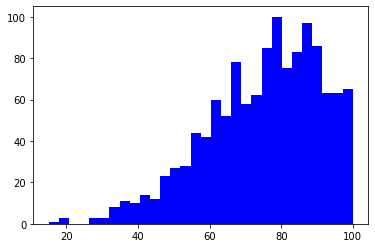

In [98]:
# Your Code Here

import matplotlib.pyplot as plt

plt.hist(filteredStudents["Score"], bins = 30, color = 'blue') # or '#A200BB' to specify an RGB colour, or single letters for basic colous e.g. 'b' for blue / 'k' for black
plt.show()

<AxesSubplot:>

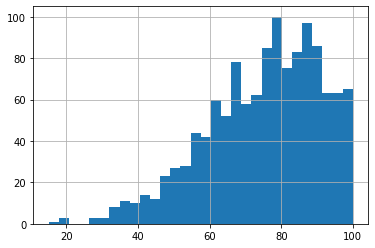

In [99]:
# Alternatively

filteredStudents["Score"].hist(bins = 30)